Code for word2vec embedding + FCNN, CNN

Please use unlabeledTrainData2.tsv, not unlabeledTrainData.tsv as that file contains a small error not compatible with this code

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pandas
import numpy
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import models
from keras import layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
train_data = pd.read_csv("labeledTrainData.tsv", delimiter='\t')
ultrain_data = pd.read_csv("unlabeledTrainData2.tsv", delimiter='\t')
test_data =  pd.read_csv("testData.tsv", delimiter='\t')


In [0]:
def preprocess(review,remove_stopwords = False):
    # html
    review_text = BeautifulSoup(review,"html5lib").get_text()
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    words = review_text.lower().split()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
    
    return words

In [0]:
# clean_train_reviews = []
# clean_ultrain_reviews = []
# clean_test_reviews = []

# for review in train_data['review']:
#     clean_train_reviews.append(preprocess(review,remove_stopwords = True))

# for review in ultrain_data['review']:
#     clean_ultrain_reviews.append(preprocess(review, remove_stopwords = True))

# for review in test_data['review']:
#     clean_test_reviews.append(preprocess(review, remove_stopwords = True))

# print(clean_train_reviews[0][0])


In [6]:
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

clean_train_words = []
clean_ultrain_words = []
clean_test_words = []
x = 0
for review in train_data['review']:
    x += 1 
    print("on to next review # ", x)
    sentspre = tokenizer.tokenize(review.strip())
    sentspost = []
    print("tokenized")
    for i in sentspre:
        sentspost.append(preprocess(i,remove_stopwords = True))
    clean_train_words += sentspost
    print("finished this review")
print("done with labeled")
x=0
for review in ultrain_data['review']:
    x += 1
    print("on to next reviwed(unlabled)  # ", x)
    sentspre = tokenizer.tokenize(review.strip())
    sentspost = []
    print("tokenized(unlabeled)")
    for i in sentspre:
        sentspost.append(preprocess(i,remove_stopwords = True))
    clean_ultrain_words += sentspost
    print("finished this review(unlabeled)")
# for review in test_data['review']:
#     clean_test_reviews.append(preprocess(review, remove_stopwords = True))

#print(clean_train_reviews[0][0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
on to next review #  1
tokenized
finished this review
on to next review #  2
tokenized
finished this review
on to next review #  3
tokenized
finished this review
on to next review #  4
tokenized
finished this review
on to next review #  5
tokenized
finished this review
on to next review #  6
tokenized
finished this review
on to next review #  7
tokenized
finished this review
on to next review #  8
tokenized
finished this review
on to next review #  9
tokenized
finished this review
on to next review #  10
tokenized
finished this review
on to next review #  11
tokenized
finished this review
on to next review #  12
tokenized
finished this review
on to next review #  13
tokenized
finished this review
on to next review #  14
tokenized
finished this review
on to next review #  15
tokenized
finished this review
on to next review #  16
tokenized
finished this review
on to next review #  17

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


finished this review
on to next review #  232
tokenized
finished this review
on to next review #  233
tokenized
finished this review
on to next review #  234
tokenized
finished this review
on to next review #  235
tokenized
finished this review
on to next review #  236
tokenized
finished this review
on to next review #  237
tokenized
finished this review
on to next review #  238
tokenized
finished this review
on to next review #  239
tokenized
finished this review
on to next review #  240
tokenized
finished this review
on to next review #  241
tokenized
finished this review
on to next review #  242
tokenized
finished this review
on to next review #  243
tokenized
finished this review
on to next review #  244
tokenized
finished this review
on to next review #  245
tokenized
finished this review
on to next review #  246
tokenized
finished this review
on to next review #  247
tokenized
finished this review
on to next review #  248
tokenized
finished this review
on to next review #  249
to

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.happierabroad.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Streaming output truncated to the last 5000 lines.
finished this review
on to next review #  23666
tokenized
finished this review
on to next review #  23667
tokenized
finished this review
on to next review #  23668
tokenized
finished this review
on to next review #  23669
tokenized
finished this review
on to next review #  23670
tokenized
finished this review
on to next review #  23671
tokenized
finished this review
on to next review #  23672
tokenized
finished this review
on to next review #  23673
tokenized
finished this review
on to next review #  23674
tokenized
finished this review
on to next review #  23675
tokenized
finished this review
on to next review #  23676
tokenized
finished this review
on to next review #  23677
tokenized
finished this review
on to next review #  23678
tokenized
finished this review
on to next review #  23679
tokenized
finished this review
on to next review #  23680
tokenized
finished this review
on to next review #  23681
tokenized
finished this review


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Streaming output truncated to the last 5000 lines.
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  918
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  919
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  920
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  921
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  922
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  923
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  924
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  925
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  926
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  927
tokenized(unlabeled)
finished this review(unlabel

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Streaming output truncated to the last 5000 lines.
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19744
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19745
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19746
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19747
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19748
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19749
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19750
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19751
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19752
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  19753
tokenized(unlabeled)
finished

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Streaming output truncated to the last 5000 lines.
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29526
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29527
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29528
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29529
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29530
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29531
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29532
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29533
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29534
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  29535
tokenized(unlabeled)
finished

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Streaming output truncated to the last 5000 lines.
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34345
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34346
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34347
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34348
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34349
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34350
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34351
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34352
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34353
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  34354
tokenized(unlabeled)
finished

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.youtube.com/watch?v=a0KSqelmgN8"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


Streaming output truncated to the last 5000 lines.
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46813
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46814
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46815
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46816
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46817
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46818
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46819
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46820
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46821
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  46822
tokenized(unlabeled)
finished

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://jake-weird.blogspot.com/2007/08/beneath.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


finished this review(unlabeled)
on to next reviwed(unlabled)  #  48479
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48480
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48481
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48482
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48483
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48484
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48485
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48486
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48487
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48488
tokenized(unlabeled)
finished this review(unlabeled)
on to next reviwed(unlabled)  #  48489
tokenized

In [0]:
#print(clean_train_words[0].type())

In [8]:
word2vecinput = clean_train_words + clean_ultrain_words
print(len(word2vecinput))

796454


In [9]:
#word2vec model
import logging
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %message(s)', level = logging.INFO)

#word2vec model parameters can be changed
num_features = 300
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3

from gensim.models import word2vec
print("Training word2vec model")
model = word2vec.Word2Vec(word2vecinput, workers = num_workers, size = num_features, min_count = min_word_count, window = context, sample = downsampling)

model_name = "word2vec1"
model.save(model_name)

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/gensim/summarization/textcleaner.py", line 33, in <module>
    from pattern.en import tag
ModuleNotFoundError: No module named 'pattern'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 580, in format
    s = self.formatMessage(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 549, in formatMessage
    return self._style.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 391, in format
    return self._fmt % record.__dict__
TypeError: not enough arguments for format string
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main

Training word2vec model


Streaming output truncated to the last 5000 lines.
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 456, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/dist-packages/zmq/eventloop/zmqstream.py", line 486, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/dist-p

In [0]:
#print(len(clean_train_words[1]))

In [0]:
def preprocess2(review,remove_stopwords = False):
    # html
    review_text = BeautifulSoup(review,"html5lib").get_text()
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    words = review_text.lower().split()
    
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
    clean_review = ' '.join(words)
    return clean_review


In [12]:
clean_train_reviews = []
clean_ultrain_reviews = []
clean_test_reviews = []

for review in train_data['review']:
    clean_train_reviews.append(preprocess2(review,remove_stopwords = True))

for review in ultrain_data['review']:
    clean_ultrain_reviews.append(preprocess2(review, remove_stopwords = True))

for review in test_data['review']:
    clean_test_reviews.append(preprocess2(review, remove_stopwords = True))

print(clean_train_reviews[0][0])

s


In [0]:
MAX_SEQUENCE_LENGTH = 140

tokenizer = Tokenizer()


tokenizer.fit_on_texts(clean_train_reviews + clean_test_reviews)

text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)
train_inputs = pad_sequences(text_sequences,maxlen=MAX_SEQUENCE_LENGTH, padding='post')

text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# text_sequences = tokenizer.texts_to_sequences(clean_ultrain_reviews)
# ultrain_inputs = pad_sequences(text_sequences,maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')

In [14]:
print(len(train_inputs.shape))

2


In [0]:
#embedding_matrix.shape[0]

In [15]:
# FCNN, COMMENT OUT WHEN WANTING TO RUN CNN
model1 = Sequential()
embedding_matrix = model.wv.vectors
model1.add(layers.Embedding(input_dim = embedding_matrix.shape[0],
                    output_dim = embedding_matrix.shape[1],
                    input_length = MAX_SEQUENCE_LENGTH,
                    weights = [embedding_matrix],
                    trainable = False))
model1.add(layers.GlobalAveragePooling1D())
model1.add(layers.Dense(16, activation='relu'))
#model1.add(layers.Dense(16, activation='relu'))
#model1.add(layers.Dense(2, activation='relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 140, 300)          4902000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4816      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 4,906,833
Trainable params: 4,833
Non-trainable params: 4,902,000
_________________________________________________________________


In [0]:
# CNN, COMMENT IN WHEN WANTING TO RUN CNN

# model2 = Sequential()
# embedding_matrix = model.wv.vectors
# model2.add(layers.Embedding(input_dim = embedding_matrix.shape[0],
#                     output_dim = embedding_matrix.shape[1],
#                     input_length = MAX_SEQUENCE_LENGTH,
#                     weights = [embedding_matrix],
#                     trainable = False))
# #model2.add(layers.GlobalAveragePooling1D())
# model2.add(layers.Conv1D(filters = 32, kernel_size= 4, padding = 'same', activation='relu'))
# model2.add(layers.Dropout(0.3))
# model2.add(layers.MaxPooling1D())
# model2.add(layers.Conv1D(filters = 50, kernel_size= 4, padding = 'same', activation='relu'))
# model2.add(layers.Dropout(0.3))
# model2.add(layers.MaxPooling1D())
# model2.add(layers.Conv1D(filters = 16, kernel_size= 4, padding = 'same', activation='relu'))
# model2.add(layers.Flatten())

# model2.add(layers.Dense(1, activation = 'sigmoid'))
# model2.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_51 (Embedding)     (None, 100, 100)          1634000   
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 100, 32)           12832     
_________________________________________________________________
dropout_51 (Dropout)         (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d_51 (MaxPooling (None, 50, 32)            0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 50, 50)            6450      
_________________________________________________________________
dropout_52 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
max_pooling1d_52 (MaxPooling (None, 25, 50)          

In [0]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
#CHANGE TO model2.compile... for CNN

In [0]:
x_val = train_inputs[:5000]
partial_x_train = train_inputs[5000:]

y_val = np.array(train_data['sentiment'][:5000])
partial_y_train = np.array(train_data['sentiment'][5000:])

In [0]:
#partial_x_train.shape

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
 - 2s - loss: 0.6556 - acc: 0.6148 - val_loss: 0.6110 - val_acc: 0.6860
Epoch 2/40
 - 2s - loss: 0.5940 - acc: 0.6861 - val_loss: 0.5693 - val_acc: 0.7160
Epoch 3/40
 - 2s - loss: 0.5684 - acc: 0.7051 - val_loss: 0.5525 - val_acc: 0.7272
Epoch 4/40
 - 2s - loss: 0.5523 - acc: 0.7181 - val_loss: 0.5448 - val_acc: 0.7292
Epoch 5/40
 - 2s - loss: 0.5445 - acc: 0.7218 - val_loss: 0.5375 - val_acc: 0.7286
Epoch 6/40
 - 2s - loss: 0.5373 - acc: 0.7282 - val_loss: 0.6258 - val_acc: 0.6796
Epoch 7/40
 - 2s - loss: 0.5346 - acc: 0.7319 - val_loss: 0.5321 - val_acc: 0.7328
Epoch 8/40
 - 2s - loss: 0.5260 - acc: 0.7378 - val_loss: 0.5465 - val_acc: 0.7196
Epoch 9/40
 - 2s - loss: 0.5249 - acc: 0.7354 - val_loss: 0.5347 - val_acc: 0.7232
Epoch 10/40
 - 2s - loss: 0.5225 - acc: 0.7397 - val_loss: 0.5442 - val_acc: 0.7144
Epoch 11/40
 - 2s - loss: 0.5217 - acc: 0.7408 - val_loss: 0.5241 - val_acc: 0.7402
Epoch 12/40
 - 2s - loss: 0.5170 - a

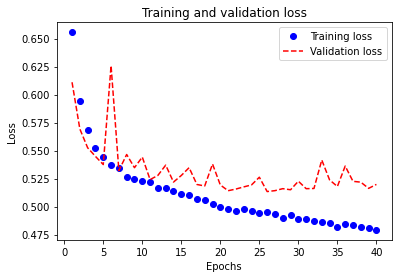

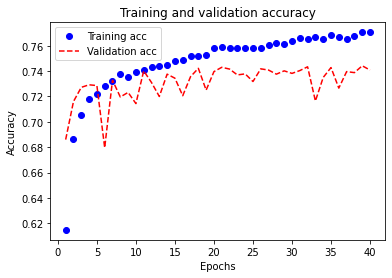

In [0]:
hist = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=32,
                    validation_data = (x_val, y_val),
                    verbose=2)
t_loss = hist.history['loss']
v_loss = hist.history['val_loss']
epochs = range(1,len(t_loss)+1)
plt.plot(epochs,t_loss, 'bo', label='Training loss')
plt.plot(epochs,v_loss, 'r--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
t_acc = hist.history['acc']
v_acc = hist.history['val_acc']
plt.plot(epochs,t_acc,'bo',label='Training acc')
plt.plot(epochs,v_acc,'r--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#CHANGE TO model2.fit.... for CNN

In [0]:
#CHANGE TO model2.evaluate... for CNN
results = model1.evaluate(x_val, y_val)

test_acc = np.round(results[1]*100, decimals = 2)
print(test_acc)

5000/5000 [==============================] - 0s 38us/step
74.08


In [0]:
hist.history['loss']

[0.6556019165992737,
 0.5940278173446655,
 0.5684401062965393,
 0.5522545912742615,
 0.5444854150295257,
 0.5373070546627045,
 0.5345908271789551,
 0.5260257061481476,
 0.5248853526115418,
 0.5224895417690277,
 0.5217498935699463,
 0.5169795211791992,
 0.5163690903663635,
 0.5134863231658936,
 0.5113866176605225,
 0.5102485170841217,
 0.5070147196292877,
 0.5055801469326019,
 0.5020086107730866,
 0.4998770034790039,
 0.4979921232223511,
 0.49627803716659546,
 0.49789293079376223,
 0.4964534891605377,
 0.4946446871757507,
 0.49532835812568665,
 0.49318579182624817,
 0.49025050234794615,
 0.49272922315597534,
 0.4888364743232727,
 0.4890379281044006,
 0.4872648665904999,
 0.4862905173778534,
 0.4856945111274719,
 0.4820536719799042,
 0.4845179018497467,
 0.48385503721237183,
 0.4814637181282043,
 0.48057381029129026,
 0.47918826475143433]

In [0]:
pred = np.rint(model1.predict(test_inputs)).astype('int32').squeeze()

In [0]:
commit_df = pd.DataFrame({'id': test_data['id'], 'sentiment':pred})

In [0]:
commit_df.to_csv('test.csv', index = False)